In [12]:
pg_mat=[[0,1,0,0,0,1,0,0],
        [0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0],
        [1,0,0,0,1,0,1,0],
        [0,1,1,0,0,0,0,1],
        [0,0,0,0,1,0,0,0],
        [1,1,1,0,0,1,0,0],
        [0,1,0,1,0,0,0,0]
      ]
pg_mat

[[0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0]]

In [13]:
nodes=['A','B','C','D','E','F','G','H']
d=0.8

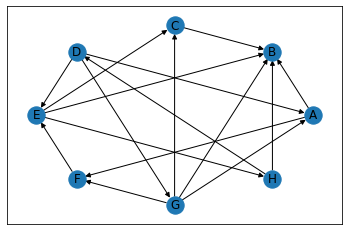

In [14]:
# using libraries
import networkx as nx
from matplotlib import pyplot as plt 
graph=nx.DiGraph() 
graph.add_nodes_from(nodes)
for i in range(8):
  for j in range(8):
    if pg_mat[i][j]==1: 
      graph.add_edge(nodes[i],nodes[j])
nx.draw_networkx(graph,pos=nx.circular_layout(graph),arrows=True,with_labels=True)
plt.show()

In [15]:
out_bound_vertices_count = [0 for _ in range(8)]

for i in range(8):
    out_bound_vertices_count[i] = sum(pg_mat[i])

out_bound_vertices_count

[2, 0, 1, 3, 3, 1, 4, 2]

In [16]:
in_bound_vertices_list = {}

for i in range(8) :
    in_bound_vertices_list[i] = []
    
    for j in range(8) :
        if pg_mat[j][i] == 1 :
            in_bound_vertices_list[i].append(j)

for i in range(8) :
    print(nodes[i], " : ", end="")
    print(", ".join([nodes[j] for j in in_bound_vertices_list[i]]))

A  : D, G
B  : A, C, E, G, H
C  : E, G
D  : H
E  : D, F
F  : A, G
G  : D
H  : E


In [17]:
def pageRank(graph, vertices_names, in_bound_vertices_list, out_bound_vertices_count, tolerance=1.0e-6, max_iterations=100) :
    
    # Number of vertices
    num_vertices = len(vertices_names)
    
    # Initialize the page ranks of all the vertices to be equal (1 / num_vertices)
    page_rank = [(1/num_vertices) for _ in range(num_vertices)]
    
    # Calculate the overall convergence condition for the combination of the whole list of vertices
    epsilon = num_vertices * tolerance
    
    # Start the algorithm
    converged = False
    for i in range(max_iterations) :
        
        # Store the old page ranks
        page_rank_old = page_rank[:]
        
        # Update the page ranks of all the vertices
        for j in range(num_vertices) :
            
            # Because of addition further ahead, we re-initialize this value
            page_rank[j] = 0
            
            # Add all the in-bound vertices page rank/out-bound count
            for k in in_bound_vertices_list[j] :
                page_rank[j] += page_rank_old[k] / out_bound_vertices_count[k]
            
        # Check for convergence condition
        error = sum([abs(page_rank[j] - page_rank_old[j]) for j in range(num_vertices)])
        if error < epsilon :
            converged = True
            break
    
    # Return the solution, only if convergence has taken place
    if converged :
        page_rank_manual = {}
        
        for i, pr in enumerate(page_rank) :
            page_rank_manual[vertices_names[i]] = pr
        
        return page_rank_manual

In [18]:
page_rank_manual = pageRank(graph, nodes, in_bound_vertices_list, out_bound_vertices_count)
page_rank_manual

{'A': 5.563153515756733e-07,
 'B': 3.82433438572732e-06,
 'C': 1.00735866138683e-06,
 'D': 6.873407767188322e-07,
 'E': 1.4964646055945424e-06,
 'F': 6.333961839903499e-07,
 'G': 3.9271032903466525e-07,
 'H': 8.437536388458218e-07}

In [19]:
page_rank_manual = sorted(page_rank_manual.items(), key=lambda item: item[1], reverse=True)
page_rank_manual

[('B', 3.82433438572732e-06),
 ('E', 1.4964646055945424e-06),
 ('C', 1.00735866138683e-06),
 ('H', 8.437536388458218e-07),
 ('D', 6.873407767188322e-07),
 ('F', 6.333961839903499e-07),
 ('A', 5.563153515756733e-07),
 ('G', 3.9271032903466525e-07)]

**Using the Libraries**

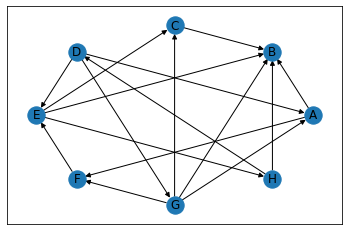

In [20]:
# using the libraries
import networkx as nx
from matplotlib import pyplot as plt 
graph=nx.DiGraph() 
graph.add_nodes_from(nodes)
for i in range(8):
  for j in range(8):
    if pg_mat[i][j]==1: 
      graph.add_edge(nodes[i],nodes[j])
nx.draw_networkx(graph,pos=nx.circular_layout(graph),arrows=True,with_labels=True)
plt.show()

In [21]:
page_ranks_networkx = nx.pagerank(graph, alpha=0.8)
print("The page ranks are :\n")
page_ranks_networkx

The page ranks are :



{'A': 0.0916182624907173,
 'B': 0.2728604840467106,
 'C': 0.11014588990263827,
 'D': 0.09023623330928761,
 'E': 0.1597114975750284,
 'F': 0.10420298098081929,
 'G': 0.07634851214143881,
 'H': 0.09487613955335977}

In [22]:
page_ranks_networkx = sorted(page_ranks_networkx.items(), key=lambda item:item[1], reverse=True)
page_ranks_networkx

[('B', 0.2728604840467106),
 ('E', 0.1597114975750284),
 ('C', 0.11014588990263827),
 ('F', 0.10420298098081929),
 ('H', 0.09487613955335977),
 ('A', 0.0916182624907173),
 ('D', 0.09023623330928761),
 ('G', 0.07634851214143881)]